# Import Data

Dataset: https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024

In [71]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
import functions as func

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cameronseamons/electronic-sales-sep2023-sep2024")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/sierra/.cache/kagglehub/datasets/cameronseamons/electronic-sales-sep2023-sep2024/versions/5


In [5]:
file_list = os.listdir(path)
print("Files in extracted folder:", file_list)

Files in extracted folder: ['Electronic_sales_Sep2023-Sep2024.csv']


In [6]:
csv_file = file_list[0]
file_path = os.path.join(path, csv_file)

df = pd.read_csv(file_path)

In [7]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


# Data Understanding

In [8]:
df.shape

(20000, 16)

In [9]:
func.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Customer ID,int64,0.00,12136,10483.526550,5631.732525,1000.00,5478.000,10499.50,15504.0000,19998.00
1,Age,int64,0.00,63,48.994100,18.038745,18.00,33.000,49.00,65.0000,80.00
2,Gender,object,0.01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loyalty Member,object,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product Type,object,0.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SKU,object,0.00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rating,int64,0.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Order Status,object,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Payment Method,object,0.00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Price,float64,0.00,104,3180.133419,2544.978675,20.75,1139.680,2534.49,4639.6000,11396.80


In [10]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

/var/folders/zg/x0sdfz7512l964gl02gm4z_80000gn/T/ipykernel_1192/3554240144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)


In [11]:
df['Add-ons Purchased'].fillna('None', inplace=True)

/var/folders/zg/x0sdfz7512l964gl02gm4z_80000gn/T/ipykernel_1192/572296405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Add-ons Purchased'].fillna('None', inplace=True)


In [12]:
func.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Customer ID,int64,0.0,12136,10483.526550,5631.732525,1000.00,5478.000,10499.50,15504.0000,19998.00
1,Age,int64,0.0,63,48.994100,18.038745,18.00,33.000,49.00,65.0000,80.00
2,Gender,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loyalty Member,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product Type,object,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SKU,object,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rating,int64,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Order Status,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Payment Method,object,0.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Price,float64,0.0,104,3180.133419,2544.978675,20.75,1139.680,2534.49,4639.6000,11396.80


In [13]:
unique_values = df['Add-ons Purchased'].unique()
print(unique_values)

['Accessory,Accessory,Accessory' 'Impulse Item' 'None'
 'Impulse Item,Impulse Item' 'Accessory' 'Impulse Item,Accessory'
 'Extended Warranty,Extended Warranty'
 'Impulse Item,Accessory,Impulse Item' 'Accessory,Extended Warranty'
 'Extended Warranty,Impulse Item,Extended Warranty'
 'Accessory,Impulse Item,Accessory' 'Impulse Item,Extended Warranty'
 'Impulse Item,Accessory,Extended Warranty'
 'Extended Warranty,Impulse Item' 'Accessory,Accessory'
 'Extended Warranty' 'Extended Warranty,Accessory'
 'Accessory,Extended Warranty,Extended Warranty' 'Accessory,Impulse Item'
 'Impulse Item,Impulse Item,Accessory'
 'Impulse Item,Extended Warranty,Impulse Item'
 'Extended Warranty,Accessory,Impulse Item'
 'Impulse Item,Accessory,Accessory'
 'Accessory,Impulse Item,Extended Warranty'
 'Accessory,Extended Warranty,Impulse Item'
 'Extended Warranty,Accessory,Extended Warranty'
 'Impulse Item,Impulse Item,Extended Warranty'
 'Impulse Item,Extended Warranty,Extended Warranty'
 'Extended Warranty,Acc

In [14]:
def clean_addons(value):
    cleaned_items = {item.strip() for item in value.split(',')}
    return ', '.join(sorted(cleaned_items))

# Apply the cleaning function to the "Add-ons Purchased" column
df['Cleaned Add-ons Purchased'] = df['Add-ons Purchased'].apply(clean_addons)

# Display the cleaned unique values
unique_values = df['Cleaned Add-ons Purchased'].unique()
print(unique_values)

['Accessory' 'Impulse Item' 'None' 'Accessory, Impulse Item'
 'Extended Warranty' 'Accessory, Extended Warranty'
 'Extended Warranty, Impulse Item'
 'Accessory, Extended Warranty, Impulse Item']


In [15]:
# Adding new columns to indicate presence (1) or absence (0) of specific add-ons
df['Add-ons Purchased Accessory'] = df['Cleaned Add-ons Purchased'].apply(lambda x: 1 if 'Accessory' in x else 0)
df['Add-ons Purchased Impulse Item'] = df['Cleaned Add-ons Purchased'].apply(lambda x: 1 if 'Impulse Item' in x else 0)
df['Add-ons Purchased Extended Warranty'] = df['Cleaned Add-ons Purchased'].apply(lambda x: 1 if 'Extended Warranty' in x else 0)

# Display the updated DataFrame
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Cleaned Add-ons Purchased,Add-ons Purchased Accessory,Add-ons Purchased Impulse Item,Add-ons Purchased Extended Warranty
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,Accessory,1,0,0
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,Impulse Item,0,1,0
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,None,0.00,None,0,0,0
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,Impulse Item,0,1,0
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,Accessory,1,0,0


In [16]:
df.drop(columns=['Cleaned Add-ons Purchased'], inplace=True)

In [17]:
df.drop(columns=['Add-ons Purchased'], inplace=True)

In [18]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total,Add-ons Purchased Accessory,Add-ons Purchased Impulse Item,Add-ons Purchased Extended Warranty
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,40.21,1,0,0
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,26.09,0,1,0
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,0.00,0,0,0
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,60.16,0,1,0
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,35.56,1,0,0


In [19]:
for column in df.columns:
    if df[column].nunique() <= 15:  # Check if unique values are 15 or fewer
        unique_values = df[column].unique()
        print(f"Unique values in '{column}' (Count: {len(unique_values)}):\n", unique_values)

Unique values in 'Gender' (Count: 2):
 ['Male' 'Female']
Unique values in 'Loyalty Member' (Count: 2):
 ['No' 'Yes']
Unique values in 'Product Type' (Count: 5):
 ['Smartphone' 'Tablet' 'Laptop' 'Smartwatch' 'Headphones']
Unique values in 'SKU' (Count: 10):
 ['SKU1004' 'SKU1002' 'SKU1005' 'SKU1001' 'SKU1003' 'LTP123' 'SMP234'
 'TBL345' 'HDP456' 'SWT567']
Unique values in 'Rating' (Count: 5):
 [2 3 5 1 4]
Unique values in 'Order Status' (Count: 2):
 ['Cancelled' 'Completed']
Unique values in 'Payment Method' (Count: 6):
 ['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']
Unique values in 'Unit Price' (Count: 14):
 [ 791.19  247.03  463.96   20.75  844.83  826.04  932.03  861.7   766.8
  674.32 1139.68  786.41  361.18  459.5 ]
Unique values in 'Quantity' (Count: 10):
 [ 7  3  4  2  9 10  6  5  1  8]
Unique values in 'Shipping Type' (Count: 5):
 ['Standard' 'Overnight' 'Express' 'Same Day' 'Expedited']
Unique values in 'Add-ons Purchased Accessory' (Count: 2):
 [1 0]
Uni

In [20]:
func.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,Customer ID,int64,0.0,12136,10483.526550,5631.732525,1000.00,5478.000,10499.50,15504.0000,19998.00
1,Age,int64,0.0,63,48.994100,18.038745,18.00,33.000,49.00,65.0000,80.00
2,Gender,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loyalty Member,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product Type,object,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SKU,object,0.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rating,int64,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Order Status,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Payment Method,object,0.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Price,float64,0.0,104,3180.133419,2544.978675,20.75,1139.680,2534.49,4639.6000,11396.80


There is no outlier of Age.
----------------------Box plot---------------------


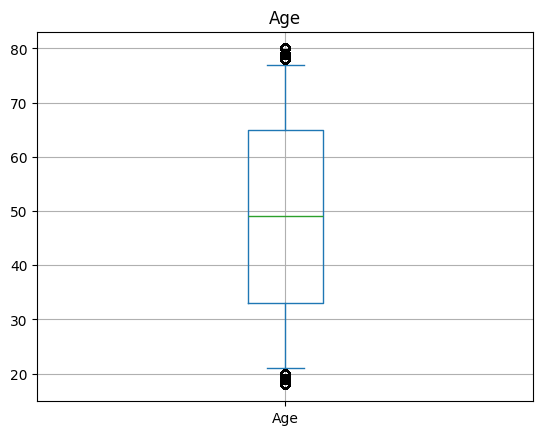

----------------------Distribution plot---------------------


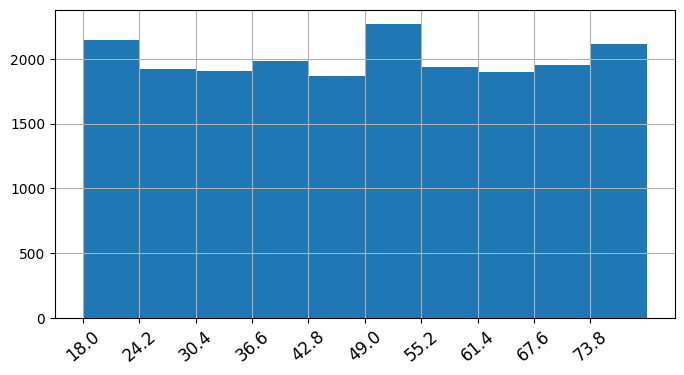

In [21]:
func.data_exploration(df, 'Age')

There are 200 of outliers for Total Price.
[11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11396.8, 11

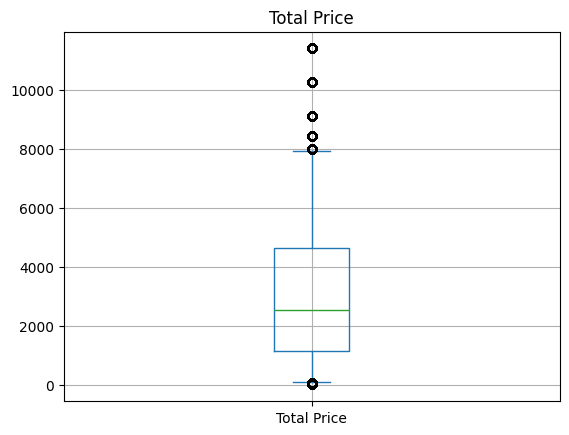

----------------------Distribution plot---------------------


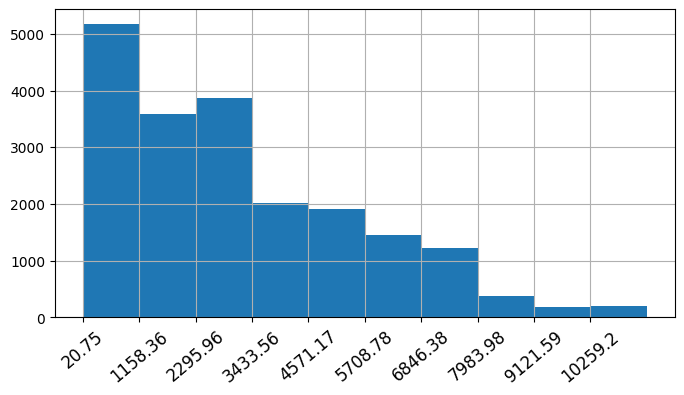

In [22]:
func.data_exploration(df, 'Total Price')

There are 147 of outliers for Add-on Total.
[246.7, 244.27, 248.68, 264.89, 262.4, 238.15, 237.39, 265.56, 250.21, 238.62, 242.47, 240.07, 266.3, 253.37, 240.01, 257.34, 237.07, 271.62, 285.72, 237.73, 237.68, 244.75, 263.01, 245.03, 257.54, 258.32, 245.25, 245.53, 240.9, 271.7, 236.67, 242.31, 238.71, 236.99, 236.53, 250.05, 238.4, 266.88, 282.13, 284.01, 266.21, 268.95, 260.36, 292.77, 254.27, 246.65, 238.3, 243.29, 244.58, 238.33, 265.09, 261.17, 236.62, 248.8, 247.06, 259.73, 248.88, 240.43, 236.75, 253.9, 242.01, 259.18, 270.87, 271.05, 263.24, 272.9, 263.27, 274.16, 250.39, 239.3, 250.52, 240.96, 259.56, 279.53, 248.67, 252.61, 253.08, 266.95, 246.88, 239.51, 236.92, 280.1, 265.97, 264.87, 253.34, 260.99, 247.88, 239.59, 252.14, 243.86, 238.71, 253.91, 265.78, 255.19, 265.02, 259.34, 245.9, 241.53, 251.53, 240.6, 258.15, 242.09, 243.97, 246.14, 242.52, 251.08, 237.81, 257.81, 252.76, 260.64, 238.53, 241.68, 239.69, 237.12, 241.35, 263.86, 247.52, 258.29, 257.17, 260.6, 245.34, 25

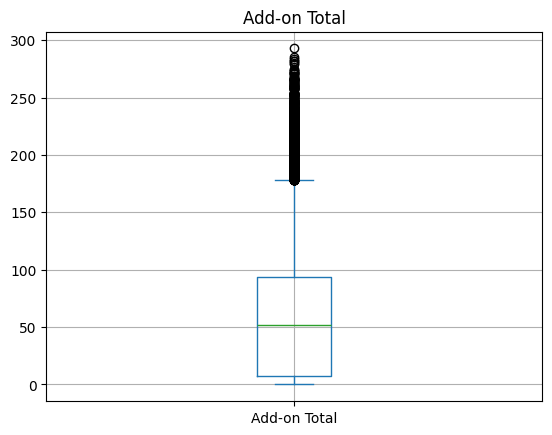

----------------------Distribution plot---------------------


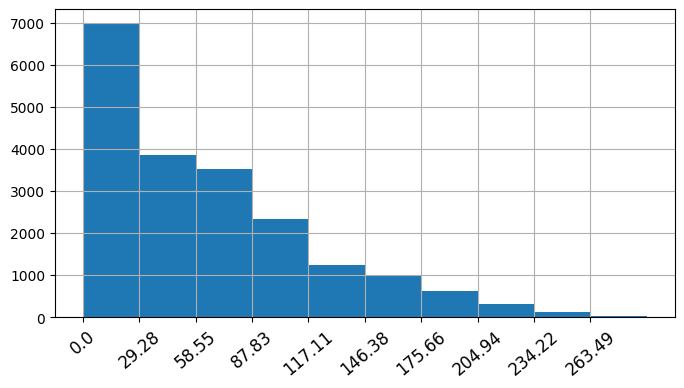

In [23]:
func.data_exploration(df, 'Add-on Total')

# Visualization

## Age Distribution of Customers

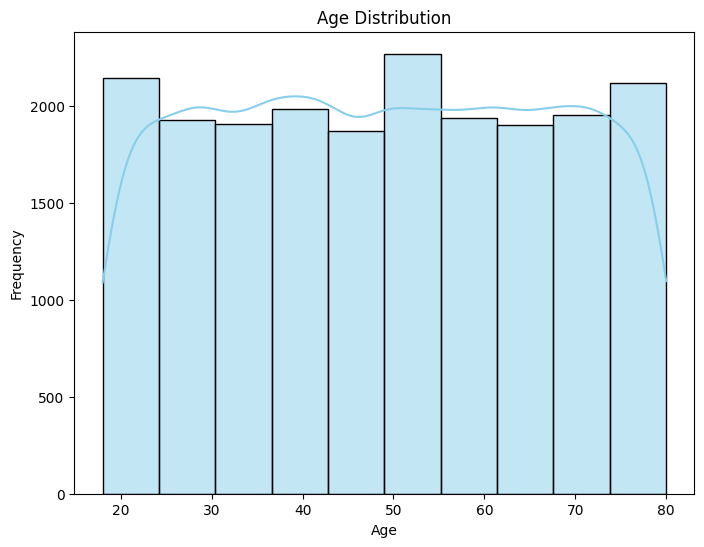

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", kde=True, bins=10, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Order Status Distribution

/var/folders/zg/x0sdfz7512l964gl02gm4z_80000gn/T/ipykernel_1192/1369788326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Order Status", palette="coolwarm")


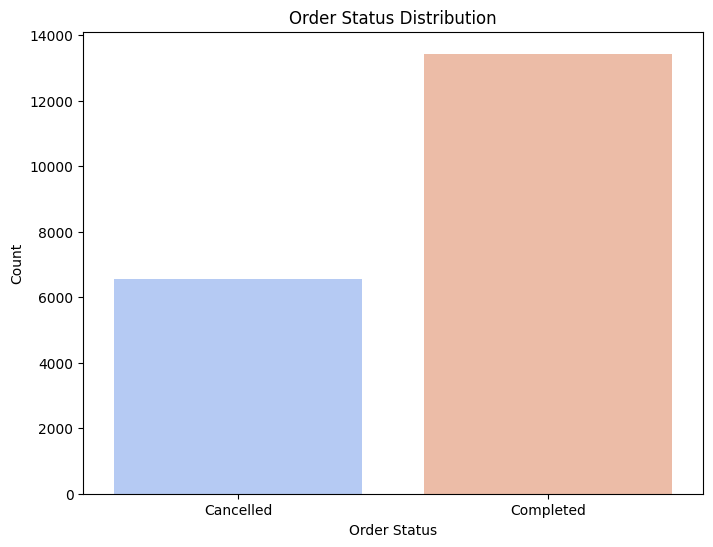

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Order Status", palette="coolwarm")
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.show()

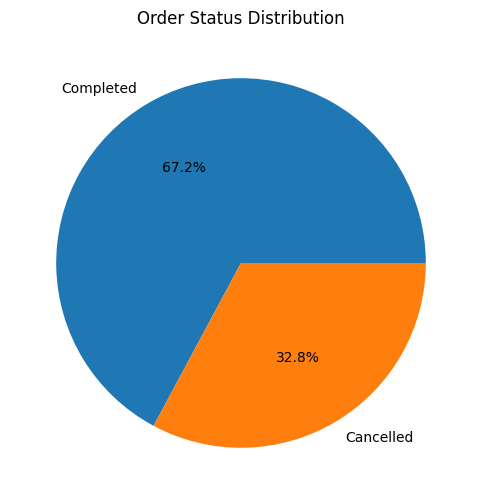

In [51]:
plt.figure(figsize=(8, 6))
loyalty_counts = df['Order Status'].value_counts()
loyalty_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Order Status Distribution')
plt.ylabel('')
plt.show()

## Payment Method Distribution

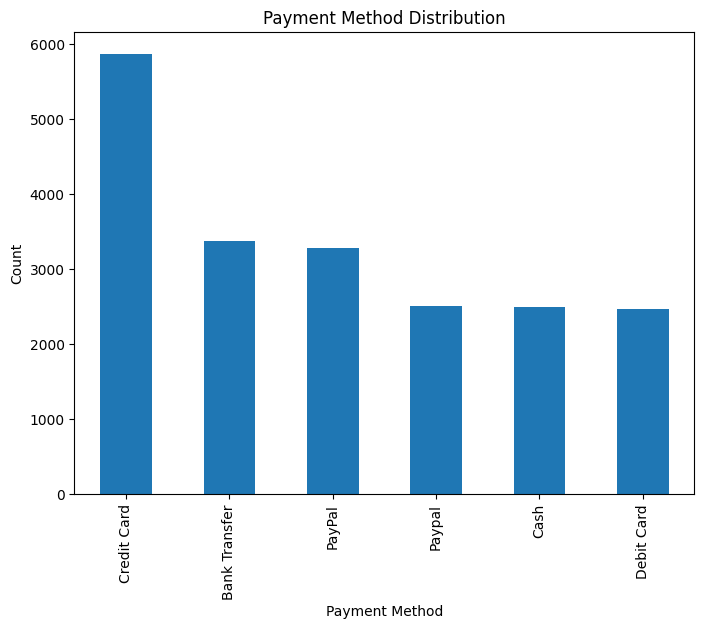

In [61]:
plt.figure(figsize=(8, 6))
payment_counts = df['Payment Method'].value_counts()
payment_counts.plot(kind='bar')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

## Distribution of Customer Ratings

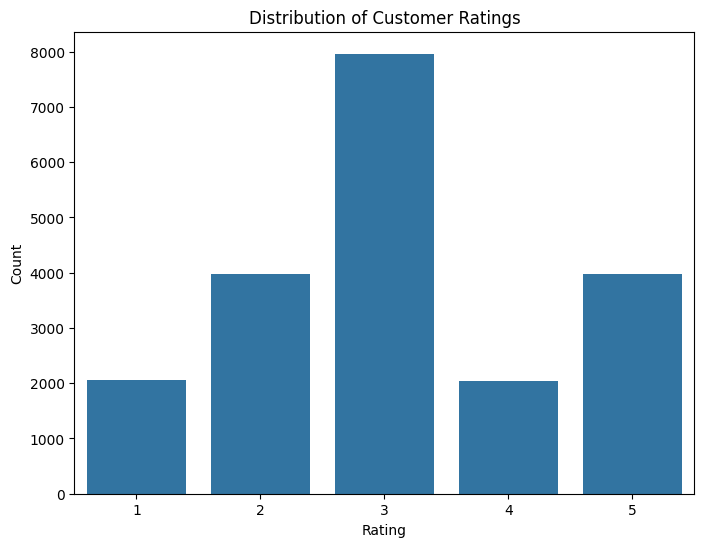

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Total Price

### Distribution of Total Price

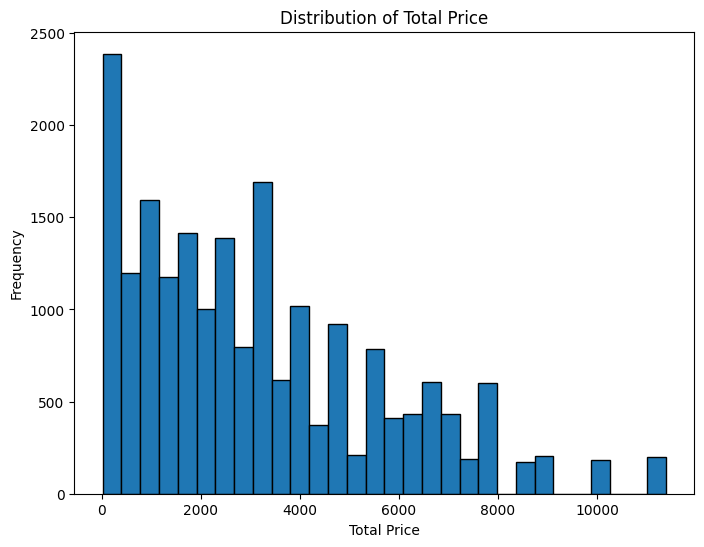

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(df['Total Price'], bins=30, edgecolor='black')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

### Unit Price vs Total Price

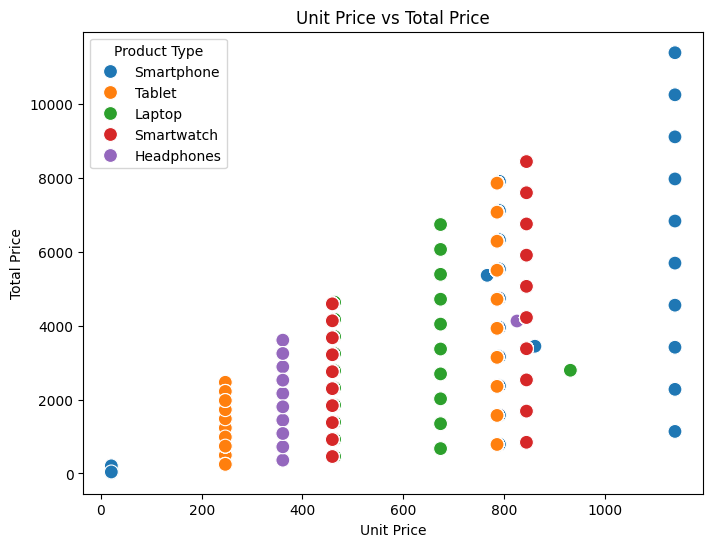

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Unit Price", y="Total Price", hue="Product Type", palette="tab10", s=100)
plt.title("Unit Price vs Total Price")
plt.xlabel("Unit Price")
plt.ylabel("Total Price")
plt.legend(title="Product Type")
plt.show()

### Total Price by Gender

/var/folders/zg/x0sdfz7512l964gl02gm4z_80000gn/T/ipykernel_1192/995174791.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='Total Price', estimator=sum, ci=None, palette='coolwarm')
/var/folders/zg/x0sdfz7512l964gl02gm4z_80000gn/T/ipykernel_1192/995174791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Total Price', estimator=sum, ci=None, palette='coolwarm')


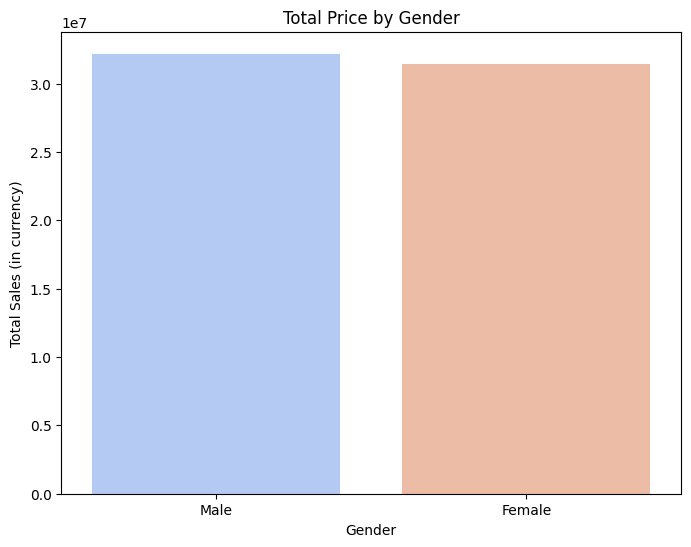

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Total Price', estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (in currency)')
plt.show()

### Total Price by Product Type

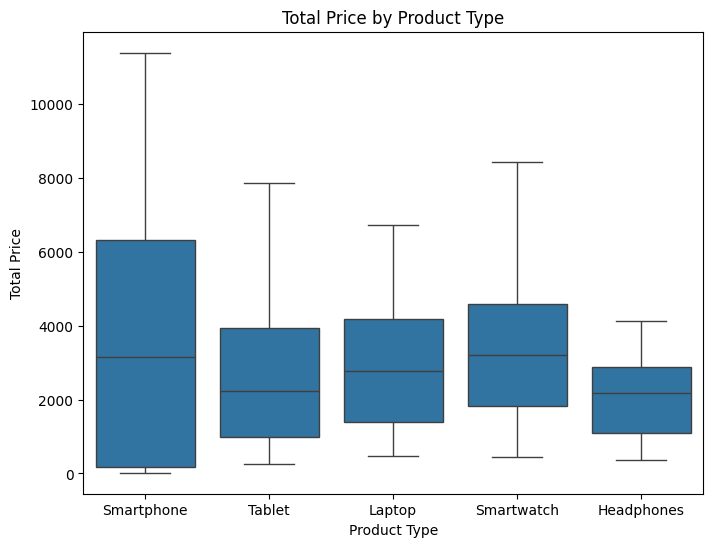

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product Type', y='Total Price', data=df)
plt.title('Total Price by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Price')
plt.show()

### Add-on Total vs. Total Price

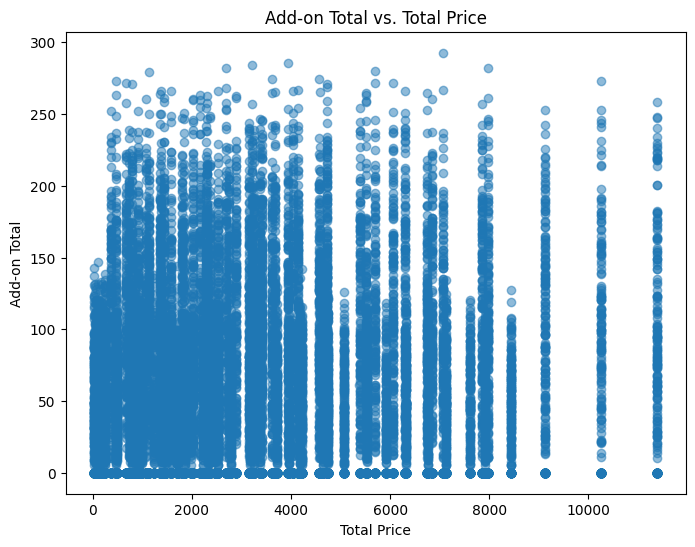

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Total Price'], df['Add-on Total'], alpha=0.5)
plt.title('Add-on Total vs. Total Price')
plt.xlabel('Total Price')
plt.ylabel('Add-on Total')
plt.show()

### Total Price by Shipping Type

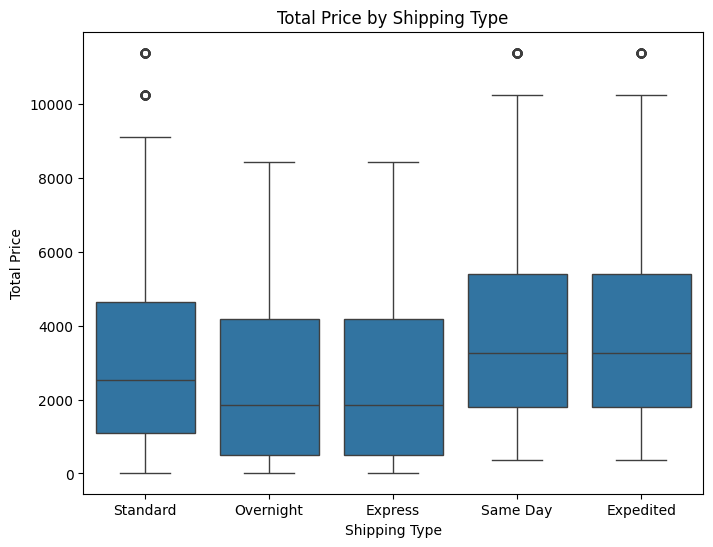

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Shipping Type', y='Total Price', data=df)
plt.title('Total Price by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Total Price')
plt.show()

### Monthly Sales Trend

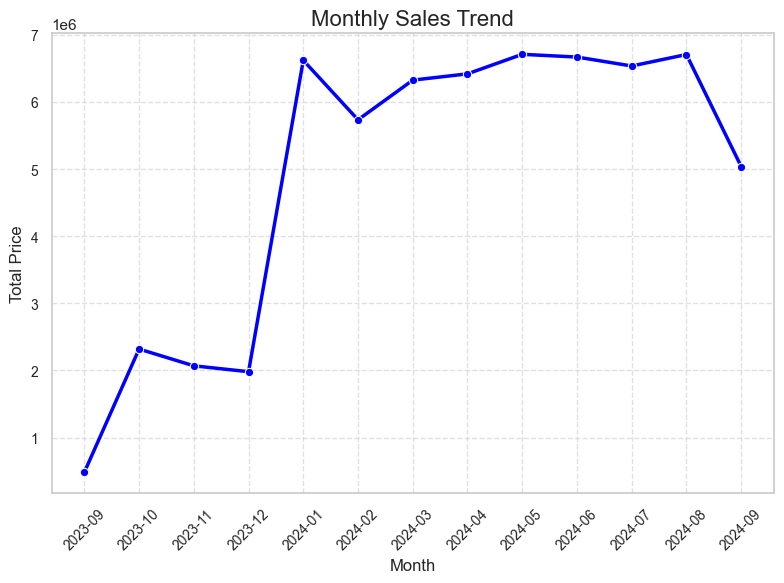

In [72]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Price'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=monthly_sales,
    x='Month',
    y='Total Price',
    marker='o',
    color='blue',
    linewidth=2.5
)

plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Price", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

## Add-ons

### Add-ons Total vs. Unit Price

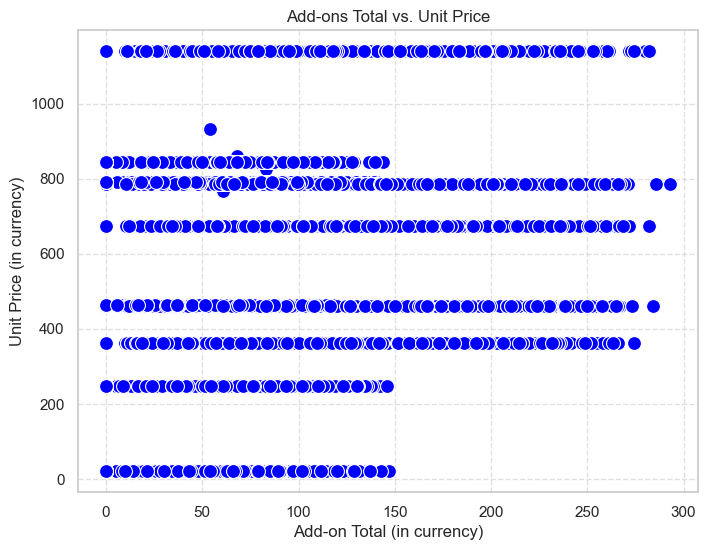

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Add-on Total", y="Unit Price", color="blue", s=100)
plt.title("Add-ons Total vs. Unit Price")
plt.xlabel("Add-on Total (in currency)")
plt.ylabel("Unit Price (in currency)")
plt.grid(linestyle="--", alpha=0.6)
plt.show()

### Add-ons Purchased Proportion

In [46]:
columns_to_extract = [
    "Add-ons Purchased Accessory",
    "Add-ons Purchased Impulse Item",
    "Add-ons Purchased Extended Warranty"
]
df_addons = df[columns_to_extract]
addon_sums = df_addons.sum()

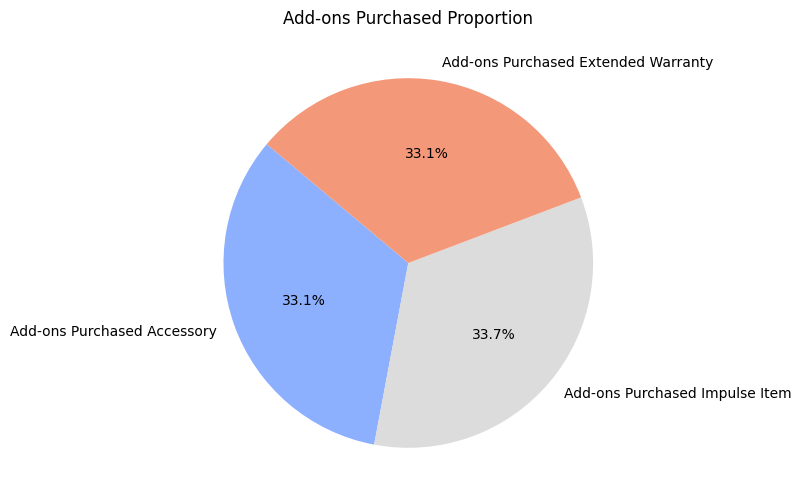

In [43]:
plt.figure(figsize=(8, 6))
plt.pie(
    addon_sums.values,
    labels=addon_sums.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("coolwarm", len(addon_sums)),
)
plt.title("Add-ons Purchased Proportion")
plt.show()

### Add-ons Distribution by Product Type

In [44]:
addons_by_product = df.groupby("Product Type")[
    ["Add-ons Purchased Accessory", "Add-ons Purchased Impulse Item", "Add-ons Purchased Extended Warranty"]
].sum()

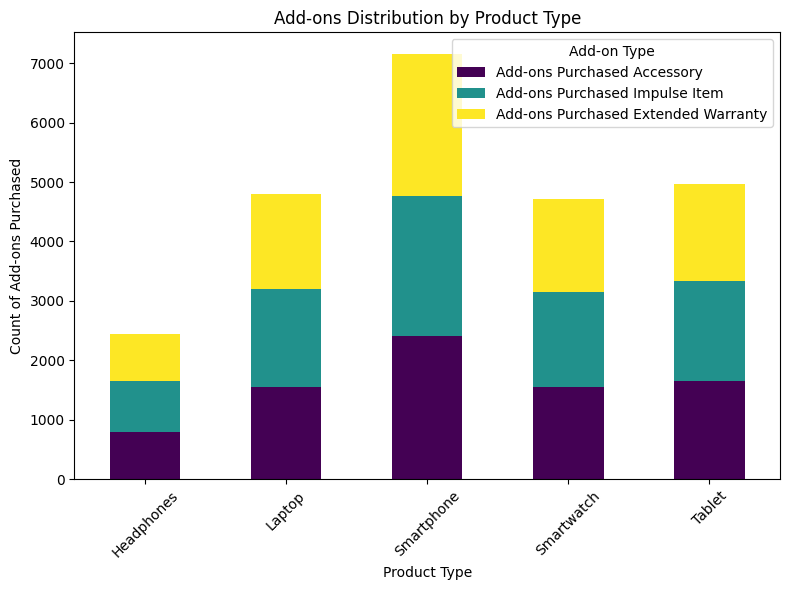

In [49]:
addons_by_product.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")
plt.title("Add-ons Distribution by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Count of Add-ons Purchased")
plt.legend(title="Add-on Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Add-ons Purchased by Product Type (Line Chart)

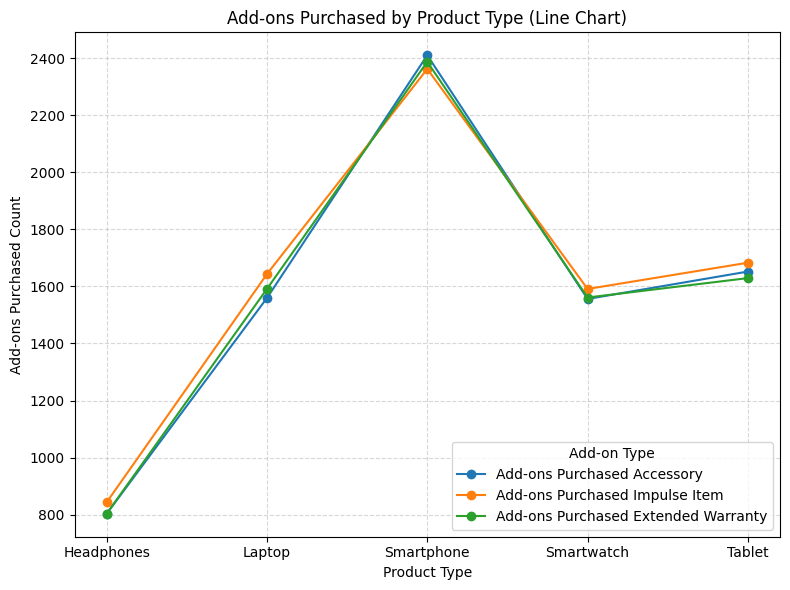

In [57]:
plt.figure(figsize=(8, 6))
for addon in addons_by_product.columns:
    plt.plot(addons_by_product.index, addons_by_product[addon], marker='o', label=addon)

plt.title("Add-ons Purchased by Product Type (Line Chart)")
plt.xlabel("Product Type")
plt.ylabel("Add-ons Purchased Count")
plt.legend(title="Add-on Type")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Add-ons Purchased Trend Over Time

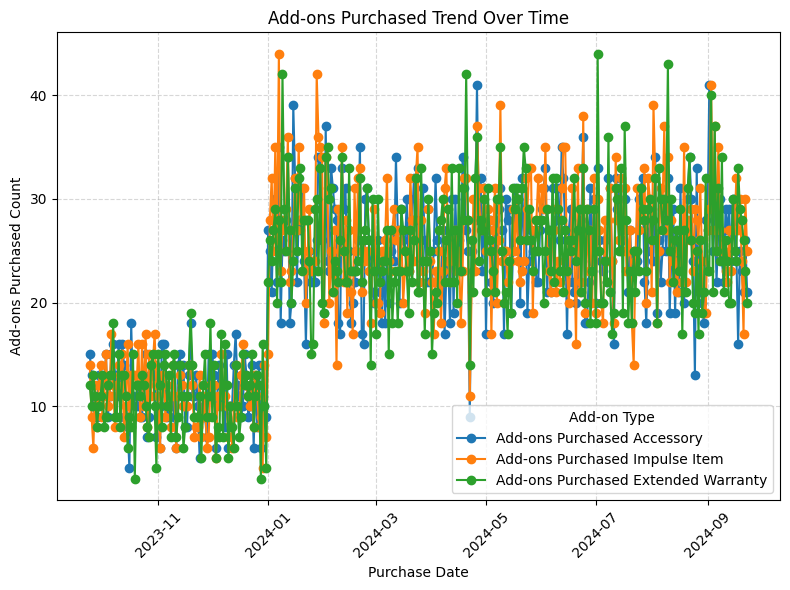

In [59]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

df = df.sort_values("Purchase Date")

addons_by_date = df.groupby("Purchase Date")[
    ["Add-ons Purchased Accessory", "Add-ons Purchased Impulse Item", "Add-ons Purchased Extended Warranty"]
].sum()

plt.figure(figsize=(8, 6))
for addon in addons_by_date.columns:
    plt.plot(addons_by_date.index, addons_by_date[addon], marker='o', label=addon)

plt.title("Add-ons Purchased Trend Over Time")
plt.xlabel("Purchase Date")
plt.ylabel("Add-ons Purchased Count")
plt.xticks(rotation=45)
plt.legend(title="Add-on Type")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Heatmap of Add-ons Purchased by Product Type

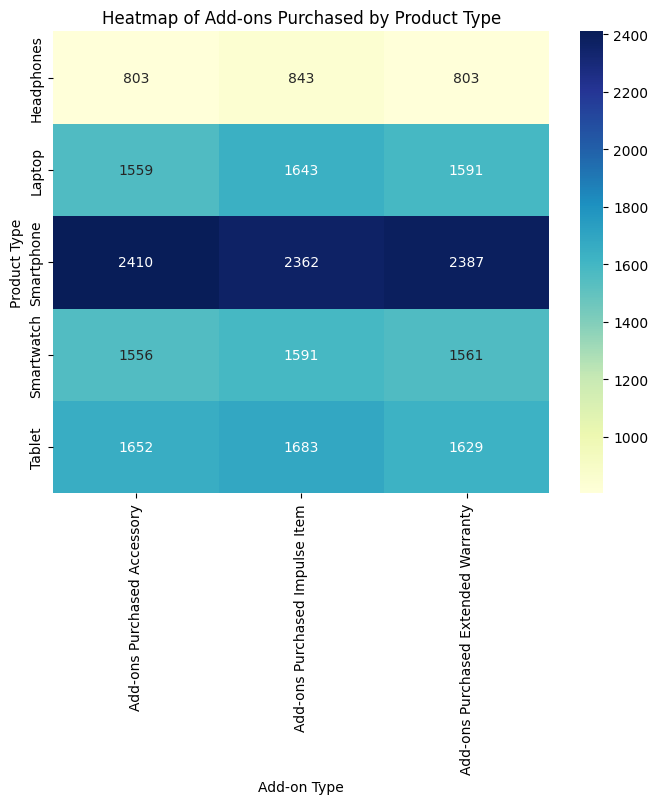

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(addons_by_product, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Add-ons Purchased by Product Type")
plt.xlabel("Add-on Type")
plt.ylabel("Product Type")
plt.show()

## Proportion of Loyalty Members

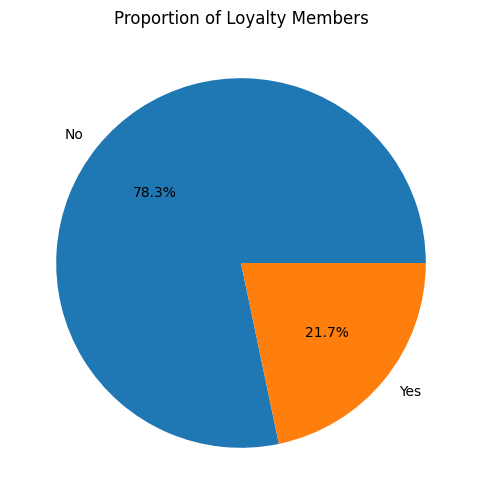

In [37]:
plt.figure(figsize=(8, 6))
loyalty_counts = df['Loyalty Member'].value_counts()
loyalty_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Loyalty Members')
plt.ylabel('')
plt.show()